# DATASCI 290 - GenAI - Assignment 5 - Analysis

This notebook contains supplemental analysis that's referenced in the main report.

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
!pip install plotly

In [41]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Experiment 2A: Chunk Size

In [42]:
# read results from Google Drive
exp2a = pd.read_csv('drive/My Drive/290_colab/exp2a_chunk_size.csv')
exp2a = exp2a.sort_values(by=['overall_f1', 'avg_bert_f1', 'avg_rouge1', 'avg_squad_f1'], ascending=False)
exp2a.head(5)

,embed_model,chunk_size,chunk_overlap,num_splits,rsch_bert_F1,mktg_bert_F1,rsch_rouge1,mktg_rouge1,rsch_squad_F1,mktg_squad_F1,rsch_bleu,mktg_bleu,rsch_word_ratio,mktg_word_ratio,avg_bert_f1,avg_rouge1,avg_squad_f1,overall_f1,N,temperature
0,multi-qa-mpnet-base-dot-v1,700,0,2820,0.809272,0.825310,0.358759,0.340651,0.331816,0.320695,0.091285,0.109356,1.132139,1.679790,0.817291,0.349705,0.326255,0.497751,10,0.6
1,multi-qa-mpnet-base-dot-v1,800,0,2498,0.809237,0.814924,0.373292,0.312376,0.349580,0.287284,0.094069,0.082813,1.322508,1.338583,0.812080,0.342834,0.318432,0.491115,10,0.6
2,multi-qa-mpnet-base-dot-v1,500,0,3904,0.799592,0.816234,0.352607,0.299776,0.332942,0.281324,0.069596,0.073407,1.269877,1.443570,0.807913,0.326192,0.307133,0.480412,10,0.6
3,multi-qa-mpnet-base-dot-v1,600,0,3279,0.801168,0.811663,0.336646,0.321117,0.310652,0.297179,0.063630,0.065811,1.218365,1.469816,0.806415,0.328882,0.303915,0.479737,10,0.6
4,multi-qa-mpnet-base-dot-v1,300,0,6628,0.811438,0.810747,0.359045,0.288696,0.328958,0.268003,0.081261,0.071002,1.060470,1.191601,0.811093,0.323870,0.298481,0.477815,10,0.6


In [43]:
cols = ['avg_bert_f1', 'avg_rouge1','avg_squad_f1', 'overall_f1']

correlations = {}

# Loop to calculate and store Pearson correlation coefficients
for column in cols:
    corr = exp2a['chunk_size'].corr(exp2a[column])
    correlations[column] = corr

# Print the correlations
for column, corr in correlations.items():
    print(f"Pearson correlation chunk_size vs {column}: \t{corr:.4f}")


Pearson correlation chunk_size vs avg_bert_f1: 	0.0541
Pearson correlation chunk_size vs avg_rouge1: 	0.3261
Pearson correlation chunk_size vs avg_squad_f1: 	0.3105
Pearson correlation chunk_size vs overall_f1: 	0.2860


In [44]:
# 3D Plot
X1 = exp2a['chunk_size']
# X2 = exp2b['chunk_overlap']
Y = exp2a['overall_f1']

corr_S1_Y = exp2a['chunk_size'].corr(exp2a['overall_f1'])
print(f"Pearson Correlation: {corr_S1_Y:.4f}")

Pearson Correlation: 0.2860


### Experiment 2B: Chunk Size + Chunk Overlap

In [45]:
# read results from Google Drive
exp2b = pd.read_csv('drive/My Drive/290_colab/exp2b_chunk_size_with_overlap_pct.csv')
exp2b = exp2b.sort_values(by=['overall_f1', 'avg_bert_f1', 'avg_rouge1', 'avg_squad_f1'], ascending=False)
exp2b = exp2b.reset_index(drop=True)
exp2b['chunk_overlap_pct'] = round(exp2b['chunk_overlap'] / exp2b['chunk_size'] * 100, 0)
exp2b.head(5)

,embed_model,chunk_size,chunk_overlap,num_splits,rsch_bert_F1,mktg_bert_F1,rsch_rouge1,mktg_rouge1,rsch_squad_F1,mktg_squad_F1,...,mktg_bleu,rsch_word_ratio,mktg_word_ratio,avg_bert_f1,avg_rouge1,avg_squad_f1,overall_f1,N,temperature,chunk_overlap_pct
0,multi-qa-mpnet-base-dot-v1,800,400,4133,0.815578,0.822519,0.371928,0.332765,0.344095,0.314516,...,0.090523,1.302352,1.784777,0.819048,0.352346,0.329305,0.500233,10,0.6,50.0
1,multi-qa-mpnet-base-dot-v1,700,0,2820,0.816032,0.826143,0.357536,0.332386,0.326097,0.314137,...,0.088670,1.290034,1.608924,0.821088,0.344961,0.320117,0.495388,10,0.6,0.0
2,multi-qa-mpnet-base-dot-v1,600,420,8981,0.807962,0.815367,0.370012,0.322169,0.349438,0.300189,...,0.079003,1.287794,1.724409,0.811665,0.346090,0.324813,0.494189,10,0.6,70.0
3,multi-qa-mpnet-base-dot-v1,600,180,4112,0.817315,0.812814,0.393029,0.293042,0.367982,0.276121,...,0.075738,1.337066,1.328084,0.815065,0.343035,0.322051,0.493384,10,0.6,30.0
4,multi-qa-mpnet-base-dot-v1,800,800,24807,0.810075,0.817533,0.358890,0.327412,0.335746,0.309445,...,0.095847,1.268757,1.729659,0.813804,0.343151,0.322595,0.493183,10,0.6,100.0


In [46]:
# base line model
exp2b[exp2b['chunk_size'] == 100]

,embed_model,chunk_size,chunk_overlap,num_splits,rsch_bert_F1,mktg_bert_F1,rsch_rouge1,mktg_rouge1,rsch_squad_F1,mktg_squad_F1,...,mktg_bleu,rsch_word_ratio,mktg_word_ratio,avg_bert_f1,avg_rouge1,avg_squad_f1,overall_f1,N,temperature,chunk_overlap_pct
55,multi-qa-mpnet-base-dot-v1,100,0,23747,0.802205,0.807087,0.318269,0.274944,0.294014,0.244963,...,0.074835,1.162374,1.207349,0.804646,0.296606,0.269488,0.456914,10,0.6,0.0


In [48]:

# Example data from your DataFrame
X1 = exp2b['chunk_size']
X2 = exp2b['chunk_overlap_pct']
Y = exp2b['overall_f1']


# Define a custom red and blue color scale
custom_colorscale = [
    [0, 'blue'],
    [1, 'red']
]

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=X1,
    y=X2,
    z=Y,
    mode='markers',
    marker=dict(
        size=10,
        color=Y,
        colorscale=custom_colorscale,
        opacity=.7,
        colorbar=dict(title='Overall F1')
    )
)])

# Set labels and title
fig.update_layout(
    title='Chunk Size & Overlap vs Overall F1',
    scene=dict(
        xaxis_title='Chunk Size',
        yaxis_title='Chunk Overlap %',
        zaxis_title='Overall F1'
    ),
    width=1000,
    height=800
)

# Show the plot
fig.show()


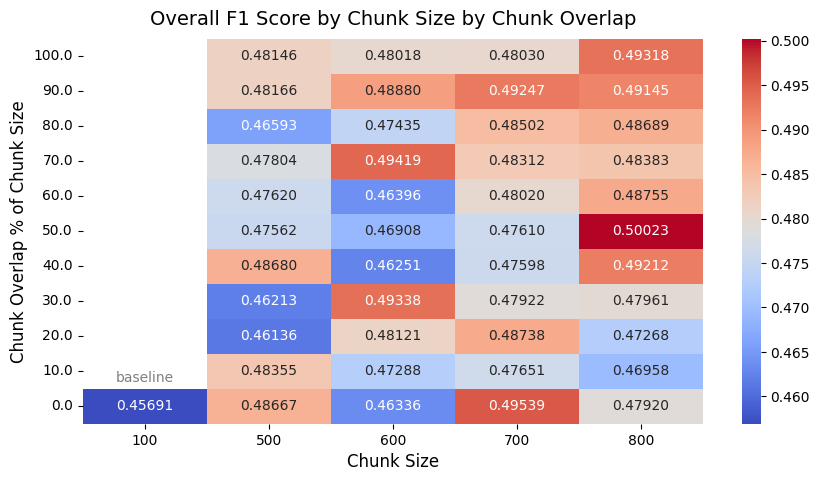

In [63]:
X1 = exp2b['chunk_size']
X2 = exp2b['chunk_overlap_pct']
Y = exp2b['overall_f1']

df = pd.DataFrame({'chunk_size': X1, 'chunk_overlap': X2, 'overall_f1': Y})

aggregated_df = df.groupby(['chunk_size', 'chunk_overlap']).agg('max').reset_index()
heatmap_data = aggregated_df.pivot(index='chunk_overlap', columns='chunk_size', values='overall_f1')

# plot heatmap
plt.figure(figsize=(10, 5))
ax = sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".5f")

# labels and title
plt.xlabel('Chunk Size', fontsize=12)
plt.ylabel('Chunk Overlap % of Chunk Size', fontsize=12)
plt.title('Overall F1 Score by Chunk Size by Chunk Overlap', fontsize=14, pad=10)
plt.gca().invert_yaxis()

# Add the text annotation "baseline" at chunk_size = 100 and chunk_overlap = 20
x_position = heatmap_data.columns.get_loc(100) + 0.5
y_position = heatmap_data.index.get_loc(20) + 0.5

# Lower the text slightly on the y-axis
ax.annotate('baseline', xy=(x_position, y_position),
            xytext=(x_position, y_position - 1.18),
            textcoords='data',
            fontsize=10, color='gray', ha='center', va='center',
            )

# Show the plot
plt.show()

### Experiment 3:Embedding Models

In [50]:
# read results from Google Drive
exp3 = pd.read_csv('drive/My Drive/290_colab/exp3_embedding_model.csv')
exp3

,embed_model,chunk_size,chunk_overlap,num_splits,rsch_bert_F1,mktg_bert_F1,rsch_rouge1,mktg_rouge1,rsch_squad_F1,mktg_squad_F1,rsch_bleu,mktg_bleu,rsch_word_ratio,mktg_word_ratio,avg_bert_f1,avg_rouge1,avg_squad_f1,overall_f1,N,temperature
0,all-mpnet-base-v2,800,400,4133,0.803249,0.816119,0.319997,0.322710,0.303194,0.303980,0.109438,0.064909,1.193729,1.813648,0.809684,0.321353,0.303587,0.478208,10,0.6
1,all-MiniLM-L6-v2,800,400,4133,0.798787,0.809968,0.344249,0.310870,0.320260,0.302147,0.083635,0.053904,1.370661,1.650919,0.804377,0.327560,0.311204,0.481047,10,0.6
2,multi-qa-mpnet-base-dot-v1,800,400,4133,0.809216,0.815538,0.365645,0.306249,0.337747,0.286798,0.101592,0.078830,1.291153,2.055118,0.812377,0.335947,0.312272,0.486865,10,0.6
3,all-distilroberta-v1,800,400,4133,0.817051,0.816153,0.400121,0.315482,0.370550,0.290674,0.111959,0.081302,1.239642,1.677165,0.816602,0.357801,0.330612,0.501672,10,0.6
4,avsolatorio/GIST-Embedding-v0,800,400,4133,0.808143,0.819602,0.346174,0.300430,0.317653,0.286697,0.089527,0.092864,1.296753,1.559055,0.813872,0.323302,0.302175,0.479783,10,0.6


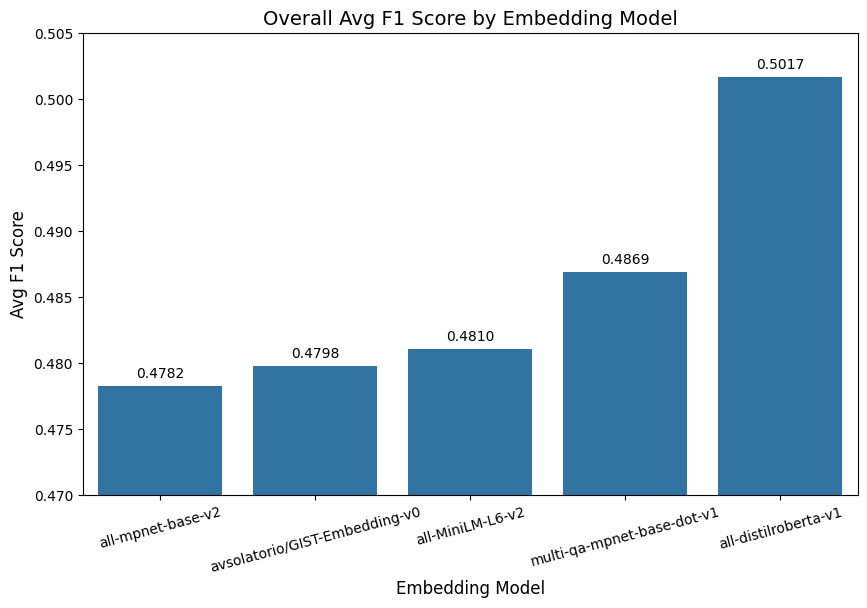

In [51]:
# Sort the DataFrame by 'overall_f1' in ascending order
exp3 = exp3.sort_values(by=['overall_f1'], ascending=True)
df_melted = exp3.melt(id_vars='embed_model', value_vars=['overall_f1'],
                    var_name='metric', value_name='value')

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_melted, x='embed_model', y='value')

# Add value annotations on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

# Set labels and title
plt.xlabel('Embedding Model', fontsize=12)
plt.ylabel('Avg F1 Score', fontsize=12)
plt.title('Overall Avg F1 Score by Embedding Model', fontsize=14)

plt.xticks(rotation=15)

plt.ylim(0.47, 0.505)
plt.show()

#### Temperature

In [52]:
exp4_results = pd.read_csv('drive/My Drive/290_colab/experiment4_temperature.csv')

exp4_results

,embed_model,chunk_size,chunk_overlap,num_splits,rsch_bert_F1,mktg_bert_F1,rsch_rouge1,mktg_rouge1,rsch_squad_F1,mktg_squad_F1,rsch_bleu,mktg_bleu,rsch_word_ratio,mktg_word_ratio,avg_bert_f1,avg_rouge1,avg_squad_f1,overall_f1,N,temperature
0,all-distilroberta-v1,800,400,4133,0.817051,0.816153,0.400121,0.315482,0.370550,0.290674,0.111959,0.081302,1.239642,1.677165,0.816602,0.357801,0.330612,0.501672,10,0.6
1,all-distilroberta-v1,800,400,4133,0.809726,0.808651,0.345262,0.321230,0.320172,0.295831,0.088142,0.080801,1.230683,1.737533,0.809188,0.333246,0.308002,0.483479,10,0.4
2,all-distilroberta-v1,800,400,4133,0.812014,0.807570,0.362005,0.314568,0.329287,0.301640,0.109150,0.088662,1.239642,1.716535,0.809792,0.338286,0.315464,0.487847,10,0.5
3,all-distilroberta-v1,800,400,4133,0.810787,0.827498,0.343009,0.327876,0.309980,0.313617,0.086112,0.087312,1.109742,1.551181,0.819143,0.335442,0.311798,0.488794,10,0.7
4,all-distilroberta-v1,800,400,4133,0.813738,0.830821,0.371664,0.345191,0.347723,0.334140,0.094742,0.103264,1.184770,1.543307,0.822279,0.358428,0.340932,0.507213,10,0.8


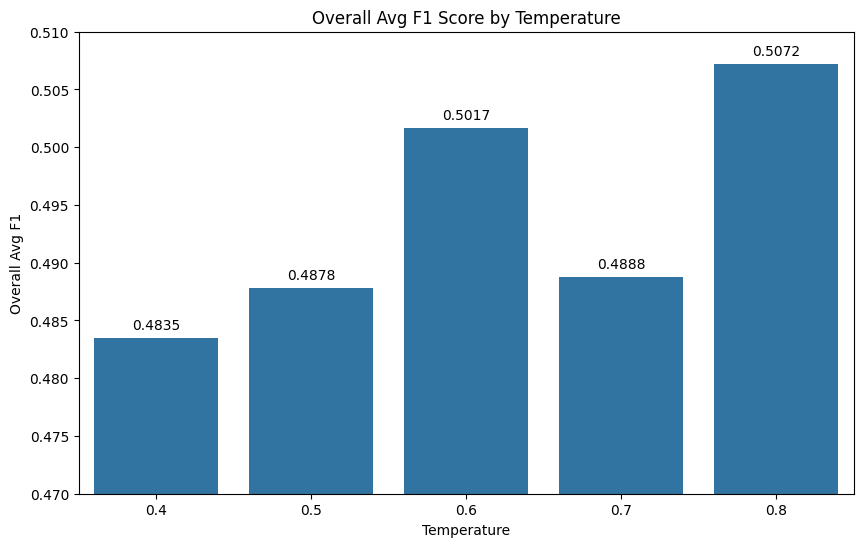

In [53]:

df_temp = exp4_results.sort_values(by=['temperature'], ascending=True)

# Melt the DataFrame to combine the metrics into one column
df_temp = exp4_results[['overall_f1', 'temperature']]

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_temp, x='temperature', y='overall_f1')

# Add value annotations on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

# Set labels and title
plt.xlabel('Temperature')
plt.ylabel('Overall Avg F1')
plt.title('Overall Avg F1 Score by Temperature')

plt.ylim(0.47, 0.51)
plt.show()

#### Experiment 5: Open-Source vs Commercial

In [54]:
# read results
exp5_results = pd.read_csv('drive/My Drive/290_colab/exp5_open_src_vs_commercial.csv')
exp5_results['chunk_overlap_pct'] = round(exp5_results['chunk_overlap'] / exp5_results['chunk_size'] * 100, 0)
exp5_results

,embed_model,chunk_size,chunk_overlap,num_splits,rsch_bert_F1,mktg_bert_F1,rsch_rouge1,mktg_rouge1,rsch_squad_F1,mktg_squad_F1,...,rsch_word_ratio,mktg_word_ratio,avg_bert_f1,avg_rouge1,avg_squad_f1,overall_f1,N,temperature,model,chunk_overlap_pct
0,all-distilroberta-v1,800,400,4133,0.813738,0.830821,0.371664,0.345191,0.347723,0.334140,...,1.18477,1.543307,0.822279,0.358428,0.340932,0.507213,10,0.8,Mistral,50.0
1,all-distilroberta-v1,800,400,4133,0.817830,0.831913,0.384338,0.360209,0.349711,0.337899,...,0.99776,1.356955,0.824872,0.372274,0.343805,0.513650,10,0.8,Cohere,50.0


In [55]:
# base line model
baseline = exp2b[exp2b['chunk_size'] == 100].copy()
baseline['model'] = 'Mistral'
baseline['chunk_overlap_pct'] = round(baseline['chunk_overlap'] / baseline['chunk_size'] * 100, 0)
baseline

,embed_model,chunk_size,chunk_overlap,num_splits,rsch_bert_F1,mktg_bert_F1,rsch_rouge1,mktg_rouge1,rsch_squad_F1,mktg_squad_F1,...,rsch_word_ratio,mktg_word_ratio,avg_bert_f1,avg_rouge1,avg_squad_f1,overall_f1,N,temperature,chunk_overlap_pct,model
55,multi-qa-mpnet-base-dot-v1,100,0,23747,0.802205,0.807087,0.318269,0.274944,0.294014,0.244963,...,1.162374,1.207349,0.804646,0.296606,0.269488,0.456914,10,0.6,0.0,Mistral


In [56]:
df_merged = pd.concat([baseline, exp5_results], ignore_index=True)
df = df_merged[['embed_model', 'chunk_size', 'chunk_overlap_pct', 'model', 'N', 'temperature', 'avg_bert_f1', 'avg_rouge1', 'avg_squad_f1', 'overall_f1']]

In [57]:
# read results
exp5_results_final = pd.read_csv('drive/My Drive/290_colab/exp5_open_src_vs_commercial_final.csv')
exp5_results_final['chunk_overlap_pct'] = round(exp5_results_final['chunk_overlap'] / exp5_results_final['chunk_size'] * 100, 0)
exp5_results_final

,embed_model,chunk_size,chunk_overlap,num_splits,rsch_bert_F1,mktg_bert_F1,rsch_rouge1,mktg_rouge1,rsch_squad_F1,mktg_squad_F1,...,rsch_word_ratio,mktg_word_ratio,avg_bert_f1,avg_rouge1,avg_squad_f1,overall_f1,N,temperature,model,chunk_overlap_pct
0,all-distilroberta-v1,800,400,4133,0.823149,0.833174,0.366424,0.351123,0.342492,0.333154,...,1.196770,1.550287,0.828161,0.358774,0.337823,0.508253,75,0.8,Mistral,50.0
1,all-distilroberta-v1,800,400,4133,0.836463,0.836441,0.420294,0.380318,0.393459,0.359949,...,1.227675,1.346983,0.836452,0.400306,0.376704,0.537821,75,0.8,Cohere,50.0


In [58]:
df_final = exp5_results_final[['embed_model', 'chunk_size', 'chunk_overlap_pct', 'model', 'N', 'temperature', 'avg_bert_f1', 'avg_rouge1', 'avg_squad_f1', 'overall_f1']]
df_final

,embed_model,chunk_size,chunk_overlap_pct,model,N,temperature,avg_bert_f1,avg_rouge1,avg_squad_f1,overall_f1
0,all-distilroberta-v1,800,50.0,Mistral,75,0.8,0.828161,0.358774,0.337823,0.508253
1,all-distilroberta-v1,800,50.0,Cohere,75,0.8,0.836452,0.400306,0.376704,0.537821


In [59]:
# Merge results from final experiments
df_merged_final = pd.concat([df_merged, df_final], ignore_index=True)
df = df_merged_final[['embed_model', 'chunk_size', 'chunk_overlap_pct', 'model', 'N', 'temperature', 'avg_bert_f1', 'avg_rouge1', 'avg_squad_f1', 'overall_f1']].copy()
df['overall_f1'] = round(df['overall_f1'], 4)
df

,embed_model,chunk_size,chunk_overlap_pct,model,N,temperature,avg_bert_f1,avg_rouge1,avg_squad_f1,overall_f1
0,multi-qa-mpnet-base-dot-v1,100,0.0,Mistral,10,0.6,0.804646,0.296606,0.269488,0.4569
1,all-distilroberta-v1,800,50.0,Mistral,10,0.8,0.822279,0.358428,0.340932,0.5072
2,all-distilroberta-v1,800,50.0,Cohere,10,0.8,0.824872,0.372274,0.343805,0.5137
3,all-distilroberta-v1,800,50.0,Mistral,75,0.8,0.828161,0.358774,0.337823,0.5083
4,all-distilroberta-v1,800,50.0,Cohere,75,0.8,0.836452,0.400306,0.376704,0.5378


In [60]:
# Add a new columns
df['chunk_overlap_pct'] = df['chunk_overlap_pct'].astype(int)
df['LLM_type'] = df['model'].apply(lambda x: 'Open Source' if x == 'Mistral' else 'Commercial')

In [61]:
df.loc[:, 'experiment'] = df['model'] + ":\nchunk size=" + df['chunk_size'].astype(str) + '\nchunk overlap=' + df['chunk_overlap_pct'].astype(str) + '%\n' \
+ df['embed_model'].astype(str) + '\ntemp=' + df['temperature'].astype(str) + '\nN=' + df['N'].astype(str)

model_column = df.pop('experiment')
df.insert(0, 'experiment', model_column)
df_final = df[['experiment', 'embed_model', 'LLM_type', 'overall_f1']].copy()

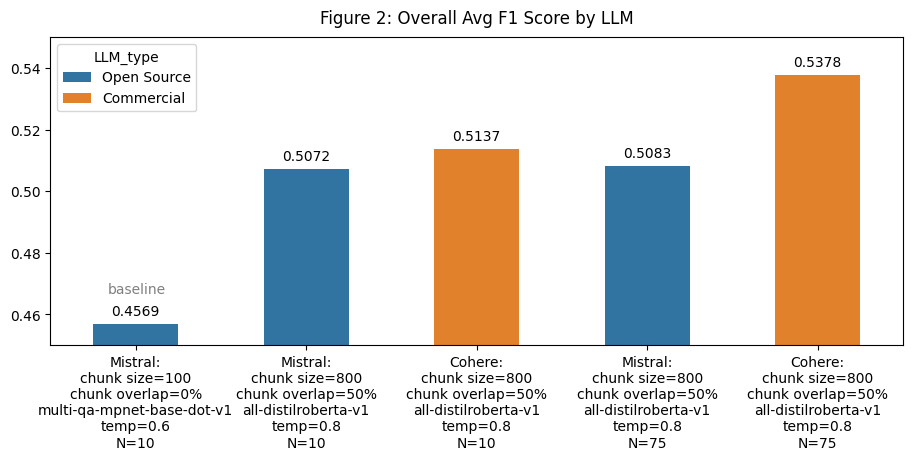

In [62]:
# Create final plot
plt.figure(figsize=(11, 4))
ax = sns.barplot(data=df_final, x='experiment', y='overall_f1', hue='LLM_type', width=0.5)

# Add annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

first_bar = ax.patches[0]
ax.annotate('baseline',
            (first_bar.get_x() + first_bar.get_width() / 2., first_bar.get_height()),
            ha='center', va='bottom',
            xytext=(1, 20),
            textcoords='offset points',
            fontsize=10, color='gray')

plt.xlabel('')
plt.ylabel('')
plt.title('Figure 2: Overall Avg F1 Score by LLM', pad=10)

plt.ylim(0.45, 0.55)

plt.show()